# Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("data1.csv")

# Drop zero Columns

# Handle null values  

# Handle Outliers

In [2]:
for column in df.columns:
    print(f"{column}: NaNs={df[column].isna().sum()}, Zeros={(df[column] == 0).sum()}, Type={df[column].dtype}")

R1-PA1:VH: NaNs=0, Zeros=0, Type=float64
R1-PM1:V: NaNs=0, Zeros=0, Type=float64
R1-PA2:VH: NaNs=0, Zeros=0, Type=float64
R1-PM2:V: NaNs=0, Zeros=0, Type=float64
R1-PA3:VH: NaNs=0, Zeros=0, Type=float64
R1-PM3:V: NaNs=0, Zeros=0, Type=float64
R1-PA4:IH: NaNs=0, Zeros=193, Type=float64
R1-PM4:I: NaNs=0, Zeros=192, Type=float64
R1-PA5:IH: NaNs=0, Zeros=192, Type=float64
R1-PM5:I: NaNs=0, Zeros=192, Type=float64
R1-PA6:IH: NaNs=0, Zeros=192, Type=float64
R1-PM6:I: NaNs=0, Zeros=192, Type=float64
R1-PA7:VH: NaNs=0, Zeros=0, Type=float64
R1-PM7:V: NaNs=0, Zeros=0, Type=float64
R1-PA8:VH: NaNs=0, Zeros=4892, Type=float64
R1-PM8:V: NaNs=0, Zeros=4892, Type=float64
R1-PA9:VH: NaNs=0, Zeros=4898, Type=float64
R1-PM9:V: NaNs=0, Zeros=4898, Type=float64
R1-PA10:IH: NaNs=0, Zeros=192, Type=float64
R1-PM10:I: NaNs=0, Zeros=192, Type=float64
R1-PA11:IH: NaNs=0, Zeros=2534, Type=float64
R1-PM11:I: NaNs=0, Zeros=2533, Type=float64
R1-PA12:IH: NaNs=0, Zeros=2505, Type=float64
R1-PM12:I: NaNs=0, Zeros=2

In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("data1.csv")

# Replace inf/-inf with NaN to standardize handling
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop columns where all values are NaN or zeros
df = df.loc[:, ~((df.isna().all()) | (df.eq(0).all()))]

# Ensure no invalid operations occur by filling residual NaNs with a placeholder
df.fillna(0, inplace=True)

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

print("Columns with all NaNs, zeros, or invalid operations have been dropped.")


Columns with all NaNs, zeros, or invalid operations have been dropped.


In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("cleaned_dataset.csv")

# Identify target column
target_feature = "marker"

# Exclude target column from preprocessing
columns_to_process = [col for col in df.columns if col != target_feature]

# Preprocessing
for column in columns_to_process:
    # Ensure there are no NaN values before replacing zeros
    df[column] = df[column].fillna(0)

    # Fill zeros
    if df[column].dtype == 'object':
        # Replace 0 in categorical columns with mode
        if (df[column] == 0).any():
            df[column] = df[column].replace(0, df[column].mode()[0])
    else:
        # Replace 0 in numerical columns based on skewness
        if abs(df[column].skew(skipna=True)) < 0.5:
            mean_val = df[column][df[column] != 0].mean()
            df[column] = df[column].replace(0, mean_val)
        else:
            median_val = df[column][df[column] != 0].median()
            df[column] = df[column].replace(0, median_val)

        # Handle outliers using IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Drop columns with all zeros
df = df.loc[:, (df != 0).any(axis=0)]

# Save preprocessed data
df.to_csv("improved_preprocessed_dataset.csv", index=False)


In [5]:
df_copy=pd.read_csv("improved_preprocessed_dataset.csv")

In [6]:
df_copy.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,relay1_log,relay2_log,relay3_log,relay4_log,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,59.999,0.01,6.341832,0.077897,2048,1,1,1,1,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,60.003,0.01,8.141328,0.027210,2048,1,1,1,1,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,60.003,0.01,8.162755,0.026663,2048,1,1,1,1,Natural
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,60.003,0.01,8.135292,0.026595,2048,1,1,1,1,Natural
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,60.001,0.01,8.036023,0.033641,2048,1,1,1,1,Natural


In [7]:
df_copy.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,relay1_log,relay2_log,relay3_log,relay4_log
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,...,4.966000e+03,4966.000000,4.966000e+03,4966.000000,4966.000000,4966.0,4966.0,4966.0,4966.0,4966.0
mean,-17.925492,131642.877159,8.610555,131381.627418,1.681621,131711.442402,-18.174249,403.779397,10.930328,403.804157,...,7.404327e+00,59.999358,1.000000e-02,10.330778,0.014666,2048.0,1.0,1.0,1.0,1.0
std,98.099812,1413.577106,115.044643,1416.152391,96.408966,1422.205311,97.374545,117.020229,111.679895,107.440501,...,1.199162e-13,0.001680,2.637045e-16,3.345532,0.097103,0.0,0.0,0.0,0.0,0.0
min,-179.988962,127622.944500,-179.994691,127322.064900,-179.960314,127622.944400,-179.988962,3.662200,-179.736860,7.507510,...,7.404327e+00,59.996000,1.000000e-02,0.267951,-0.283431,2048.0,1.0,1.0,1.0,1.0
25%,-97.404258,131007.835800,-99.085889,130706.956500,-77.405166,131064.250625,-97.626279,331.474877,-90.269501,336.006850,...,7.404327e+00,59.999000,1.000000e-02,8.257677,-0.025894,2048.0,1.0,1.0,1.0,1.0
50%,-35.864293,131634.667500,17.077007,131333.788300,14.080438,131684.814000,-33.369062,393.869610,10.930328,395.517600,...,7.404327e+00,60.000000,1.000000e-02,9.733030,0.021392,2048.0,1.0,1.0,1.0,1.0
75%,71.277382,132136.132900,116.783123,131835.253700,77.995312,132211.352700,67.545994,464.321183,115.522615,469.127820,...,7.404327e+00,60.000000,1.000000e-02,11.885319,0.059952,2048.0,1.0,1.0,1.0,1.0
max,179.994691,135521.024200,179.971773,135220.145300,179.966044,135652.658925,179.925936,862.860098,179.988962,868.490730,...,7.404327e+00,60.003000,1.000000e-02,22.768245,0.317489,2048.0,1.0,1.0,1.0,1.0


In [8]:
import pandas as pd

# Set max_info_columns to None for no limit or a specific number
pd.set_option('display.max_info_columns', 120)

# Print full info
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 120 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    R1-PA1:VH   4966 non-null   float64
 1    R1-PM1:V    4966 non-null   float64
 2    R1-PA2:VH   4966 non-null   float64
 3    R1-PM2:V    4966 non-null   float64
 4    R1-PA3:VH   4966 non-null   float64
 5    R1-PM3:V    4966 non-null   float64
 6    R1-PA4:IH   4966 non-null   float64
 7    R1-PM4:I    4966 non-null   float64
 8    R1-PA5:IH   4966 non-null   float64
 9    R1-PM5:I    4966 non-null   float64
 10   R1-PA6:IH   4966 non-null   float64
 11   R1-PM6:I    4966 non-null   float64
 12   R1-PA7:VH   4966 non-null   float64
 13   R1-PM7:V    4966 non-null   float64
 14   R1-PA8:VH   4966 non-null   float64
 15   R1-PM8:V    4966 non-null   float64
 16   R1-PA9:VH   4966 non-null   float64
 17   R1-PM9:V    4966 non-null   float64
 18   R1-PA10:IH  4966 non-null   float64
 19   R1-P

In [9]:
#input and output feature 
x=df_copy.drop("marker",axis=1)
y=df_copy["marker"]

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,encoded_data,test_size=0.25,random_state=42)

In [12]:
x_train.shape,x_test.shape

((3724, 119), (1242, 119))

In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

Text(0.5, 1.0, 'x_train after scaling')

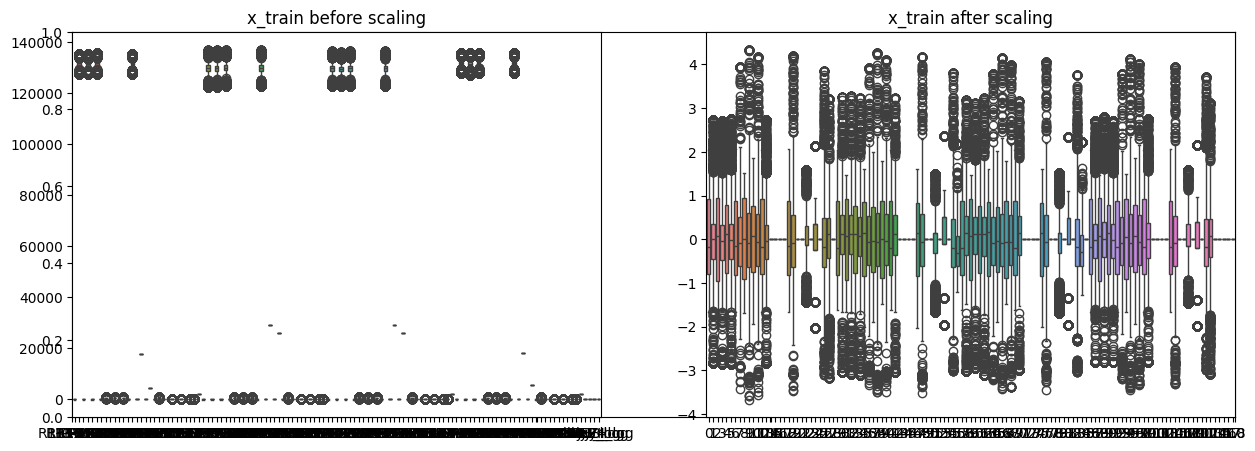

In [14]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_std)
plt.title("x_train after scaling")

# Logistic Regression

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train_std, y_train)
y_pred_log_reg = log_reg.predict(x_test_std)
# Logistic Regression Metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression:
Accuracy: 0.7681159420289855
Confusion Matrix:
 [[901  40]
 [248  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       941
           1       0.57      0.18      0.27       301

    accuracy                           0.77      1242
   macro avg       0.68      0.57      0.57      1242
weighted avg       0.73      0.77      0.72      1242



# Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train_std, y_train)
y_pred_rf = rf_clf.predict(x_test_std)
# Random Forest Metrics
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.9677938808373591
Confusion Matrix:
 [[930  11]
 [ 29 272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       941
           1       0.96      0.90      0.93       301

    accuracy                           0.97      1242
   macro avg       0.97      0.95      0.96      1242
weighted avg       0.97      0.97      0.97      1242



# Training Metrics

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_train_pred_rf = rf_clf.predict(x_train_std)  # Predictions on training data
print("\nRandom Forest Classifier - Training Metrics:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Confusion Matrix (Training):\n", confusion_matrix(y_train, y_train_pred_rf))
print("Classification Report (Training):\n", classification_report(y_train, y_train_pred_rf))



Random Forest Classifier - Training Metrics:
Training Accuracy: 1.0
Confusion Matrix (Training):
 [[2925    0]
 [   0  799]]
Classification Report (Training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2925
           1       1.00      1.00      1.00       799

    accuracy                           1.00      3724
   macro avg       1.00      1.00      1.00      3724
weighted avg       1.00      1.00      1.00      3724



# Testing Metrics

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_test_pred_rf = rf_clf.predict(x_test_std)  # Predictions on testing data
print("\nRandom Forest Classifier - Testing Metrics:")
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Confusion Matrix (Testing):\n", confusion_matrix(y_test, y_test_pred_rf))
print("Classification Report (Testing):\n", classification_report(y_test, y_test_pred_rf))



Random Forest Classifier - Testing Metrics:
Testing Accuracy: 0.9677938808373591
Confusion Matrix (Testing):
 [[930  11]
 [ 29 272]]
Classification Report (Testing):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       941
           1       0.96      0.90      0.93       301

    accuracy                           0.97      1242
   macro avg       0.97      0.95      0.96      1242
weighted avg       0.97      0.97      0.97      1242



In [19]:
df_copy.to_csv("analysis_data1.csv")

In [20]:
#write a detailed analysis report using matplotlib and seaborn for the above dataset.It has no ouliers,zeroes

In [21]:
x.columns

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       ...
       'R4-PM12:I', 'R4:F', 'R4:DF', 'R4-PA:Z', 'R4-PA:ZH', 'R4:S',
       'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log'],
      dtype='object', length=119)

In [22]:
rf_clf

RandomForestClassifier(random_state=42)

In [23]:
df_copy["marker"].value_counts()

marker
Attack     3866
Natural    1100
Name: count, dtype: int64

C:\Users\durga\AppData\Local\Temp\ipykernel_10428\176204818.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


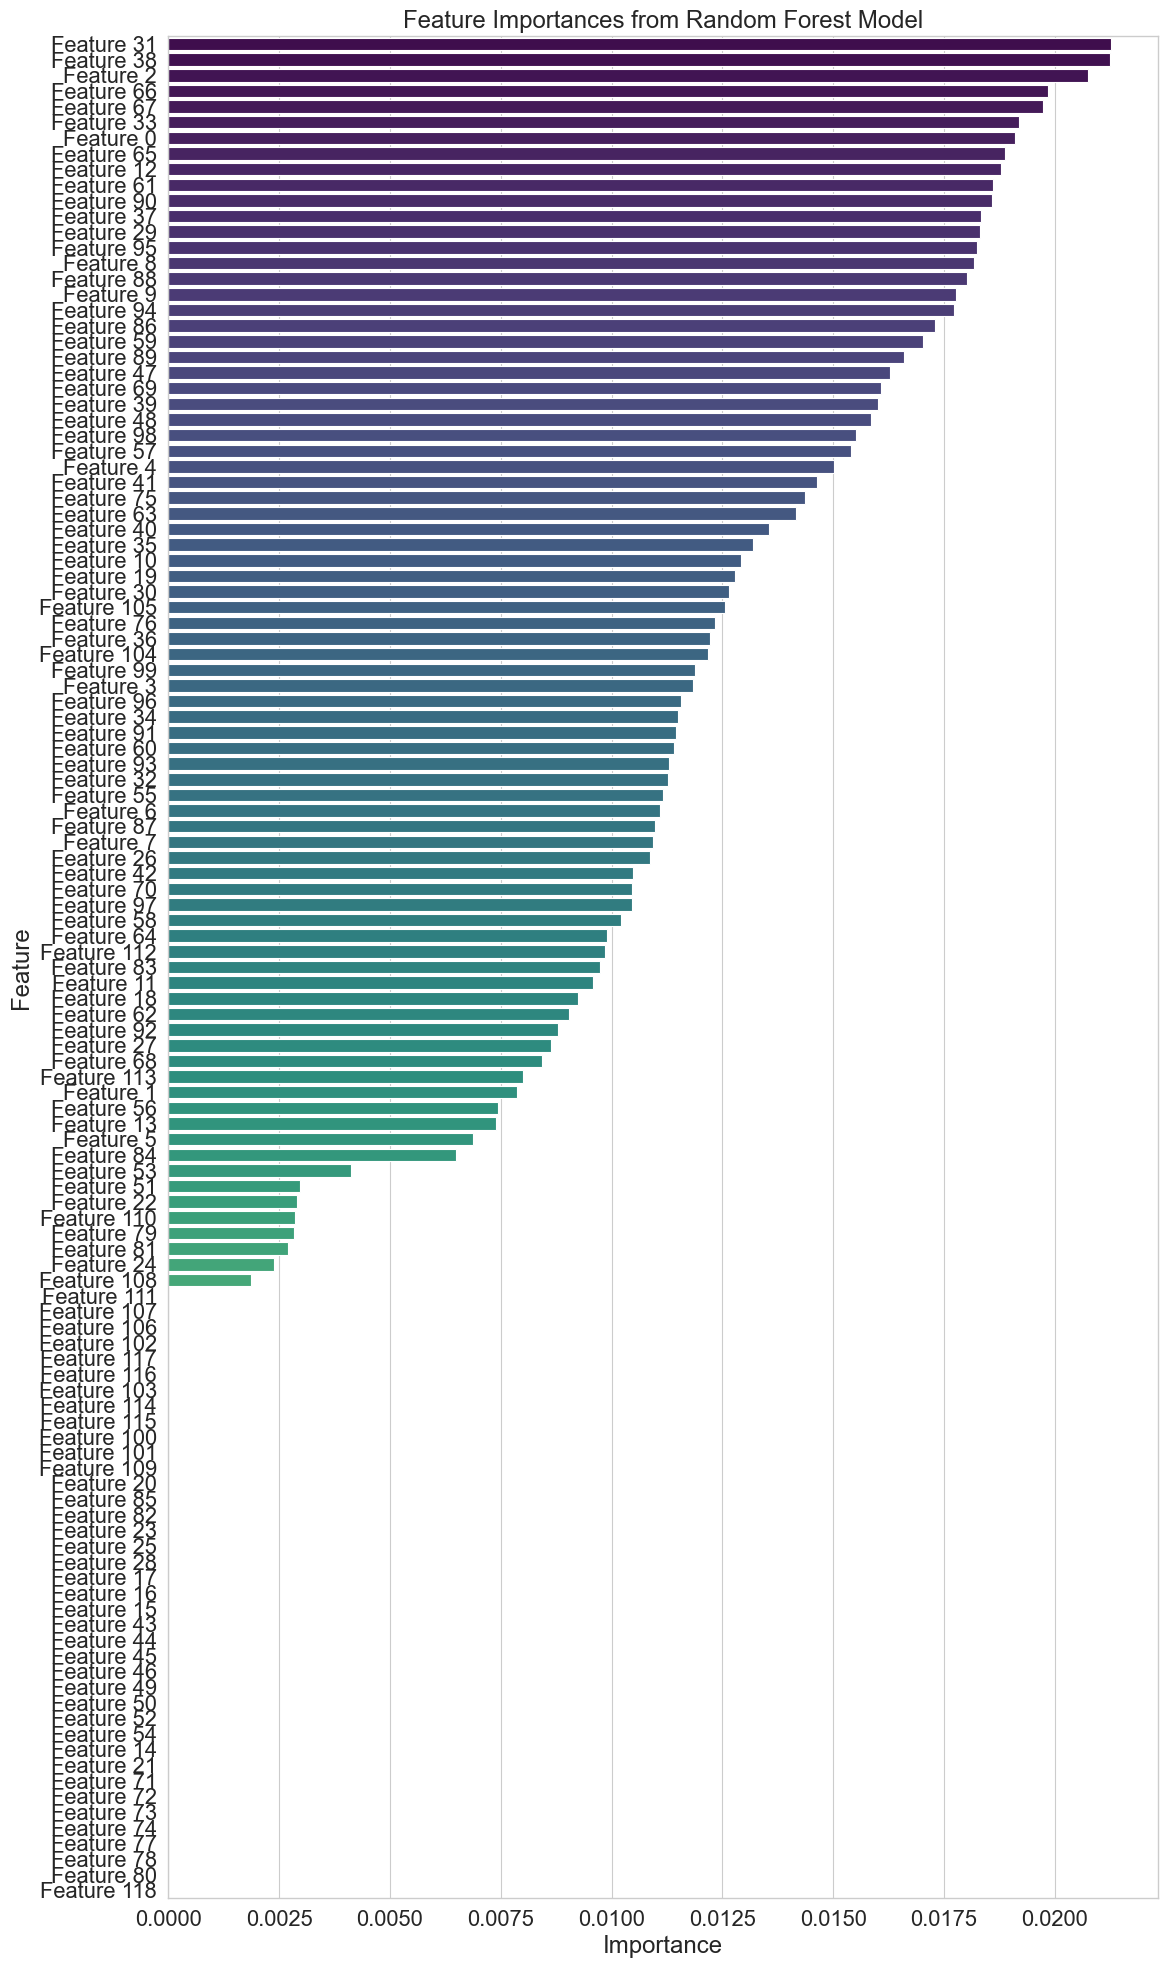

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the trained model
importances = rf_clf.feature_importances_

# Determine feature names: if x_train_std is a DataFrame, use its column names.
if hasattr(x_train_std, 'columns'):
    feature_names = x_train_std.columns
else:
    feature_names = [f'Feature {i}' for i in range(x_train_std.shape[1])]

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance (highest first)
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(12, 20))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Feature Importances from Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [25]:
x=df_copy.describe()
x.to_csv("summary.csv")

In [26]:
#%% Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
#%% Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_std, y_train)
X_resampled_test, y_resampled_test = smote.fit_resample(x_test, y_test)

# Initialize classifiers
lr   = LogisticRegression()
dtc  = DecisionTreeClassifier()
svm  = SVC(probability=True)
gbc  = GradientBoostingClassifier()
xgbc = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
etc  = ExtraTreesClassifier()
abc  = AdaBoostClassifier()
bc   = BaggingClassifier()

# Lists for classifiers and labels
all_clf    = [lr, dtc, svm, gbc, xgbc, etc, abc, bc]
clf_labels = ["Logistic Regression", "Decision Tree", "SVM", "Gradient Boosting",
              "XGBoost", "Extra Trees", "AdaBoost", "Bagging"]
colors     = ["black", "orange", "blue", "green", "pink", "red", "brown", "magenta"]
linestyles = [":", "--", "-.", "-", "-", "-", "-", "-"]

C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated 


Random Forest Classifier:
Accuracy: 0.9677938808373591
Confusion Matrix:
 [[930  11]
 [ 29 272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       941
           1       0.96      0.90      0.93       301

    accuracy                           0.97      1242
   macro avg       0.97      0.95      0.96      1242
weighted avg       0.97      0.97      0.97      1242



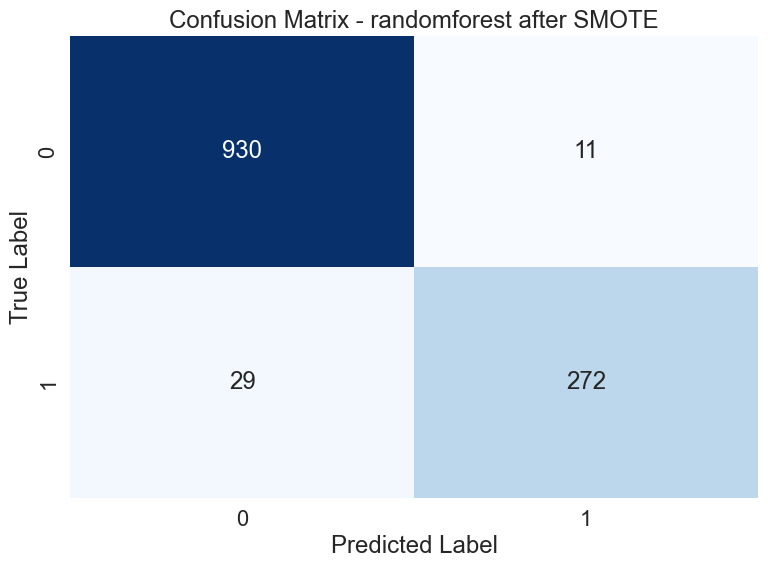

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train_std, y_train)
y_pred_rf = rf_clf.predict(x_test_std)
cm=confusion_matrix(y_test, y_pred_rf)
# Random Forest Metrics
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - randomforest after SMOTE')
plt.tight_layout()
plt.show()

C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Logistic Regression Classifier:
Accuracy: 0.7133655394524959
Confusion Matrix:
 [[616 325]
 [ 31 270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.65      0.78       941
           1       0.45      0.90      0.60       301

    accuracy                           0.71      1242
   macro avg       0.70      0.78      0.69      1242
weighted avg       0.83      0.71      0.73      1242



C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


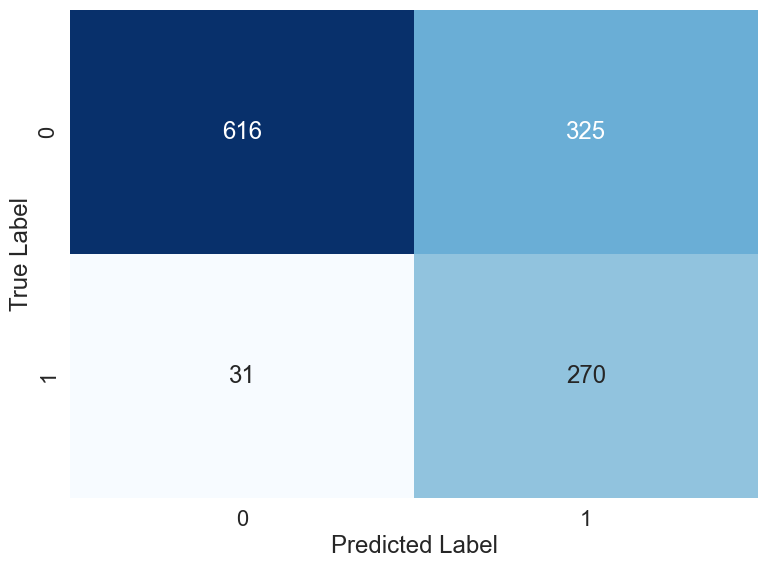


Decision Tree Classifier:
Accuracy: 0.894524959742351
Confusion Matrix:
 [[860  81]
 [ 50 251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       941
           1       0.76      0.83      0.79       301

    accuracy                           0.89      1242
   macro avg       0.85      0.87      0.86      1242
weighted avg       0.90      0.89      0.90      1242



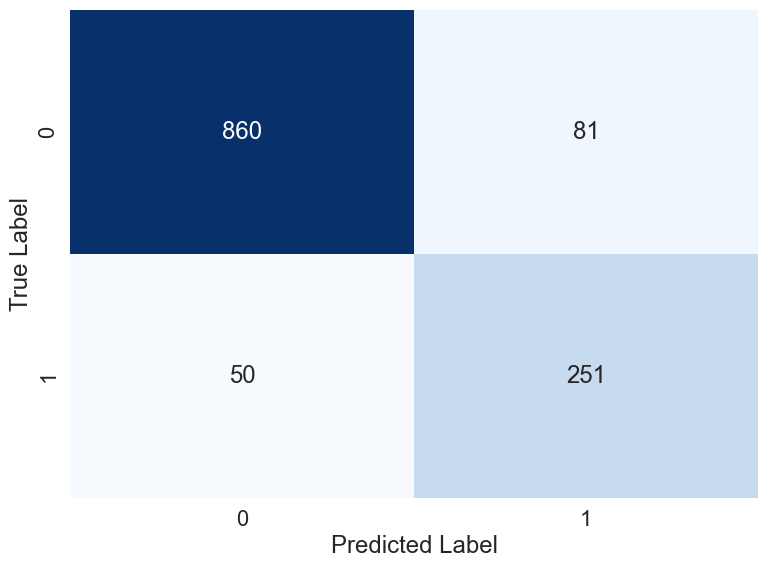


SVM Classifier:
Accuracy: 0.7463768115942029
Confusion Matrix:
 [[668 273]
 [ 42 259]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81       941
           1       0.49      0.86      0.62       301

    accuracy                           0.75      1242
   macro avg       0.71      0.79      0.72      1242
weighted avg       0.83      0.75      0.76      1242



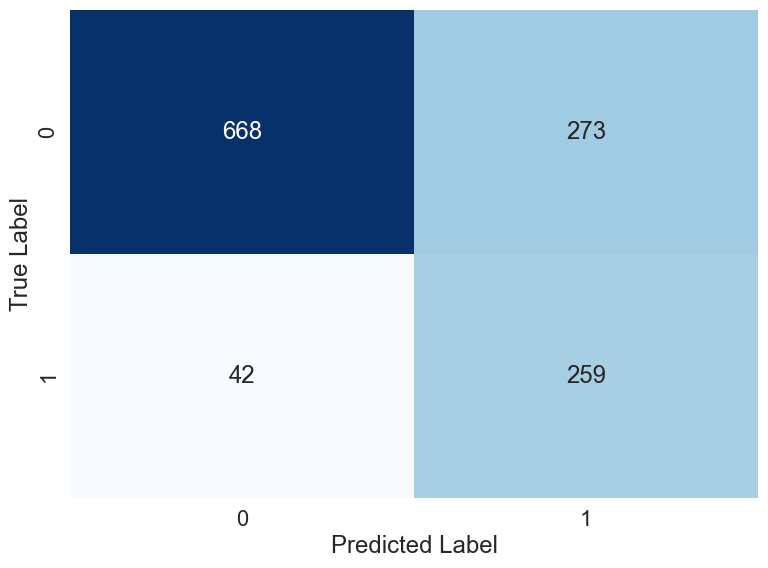


Gradient Boosting Classifier:
Accuracy: 0.8454106280193237
Confusion Matrix:
 [[791 150]
 [ 42 259]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       941
           1       0.63      0.86      0.73       301

    accuracy                           0.85      1242
   macro avg       0.79      0.85      0.81      1242
weighted avg       0.87      0.85      0.85      1242



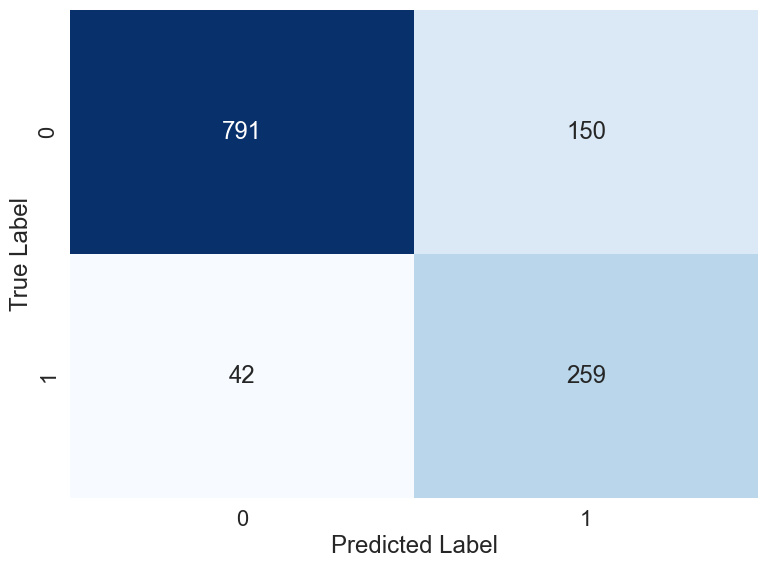


XGBoost Classifier:


C:\Users\durga\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [19:23:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9710144927536232
Confusion Matrix:
 [[918  23]
 [ 13 288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       941
           1       0.93      0.96      0.94       301

    accuracy                           0.97      1242
   macro avg       0.96      0.97      0.96      1242
weighted avg       0.97      0.97      0.97      1242



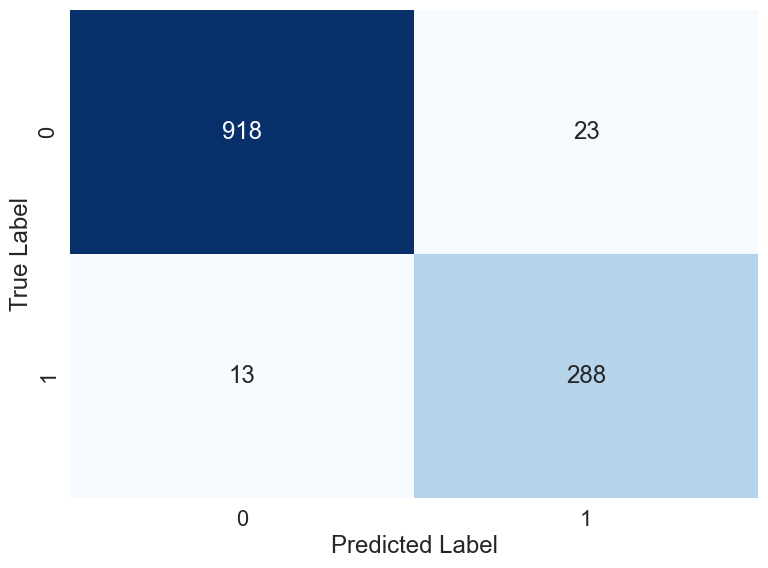


Extra Trees Classifier:
Accuracy: 0.9734299516908212
Confusion Matrix:
 [[923  18]
 [ 15 286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       941
           1       0.94      0.95      0.95       301

    accuracy                           0.97      1242
   macro avg       0.96      0.97      0.96      1242
weighted avg       0.97      0.97      0.97      1242



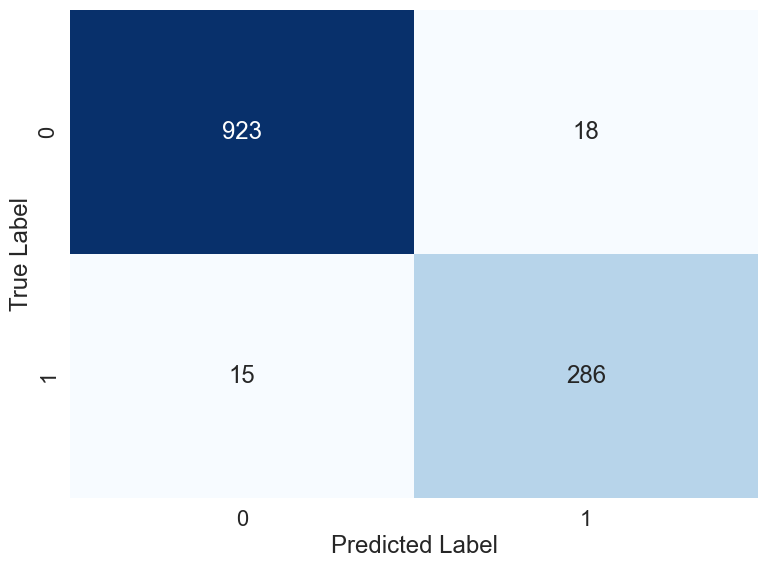


AdaBoost Classifier:
Accuracy: 0.7085346215780999
Confusion Matrix:
 [[637 304]
 [ 58 243]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78       941
           1       0.44      0.81      0.57       301

    accuracy                           0.71      1242
   macro avg       0.68      0.74      0.68      1242
weighted avg       0.80      0.71      0.73      1242



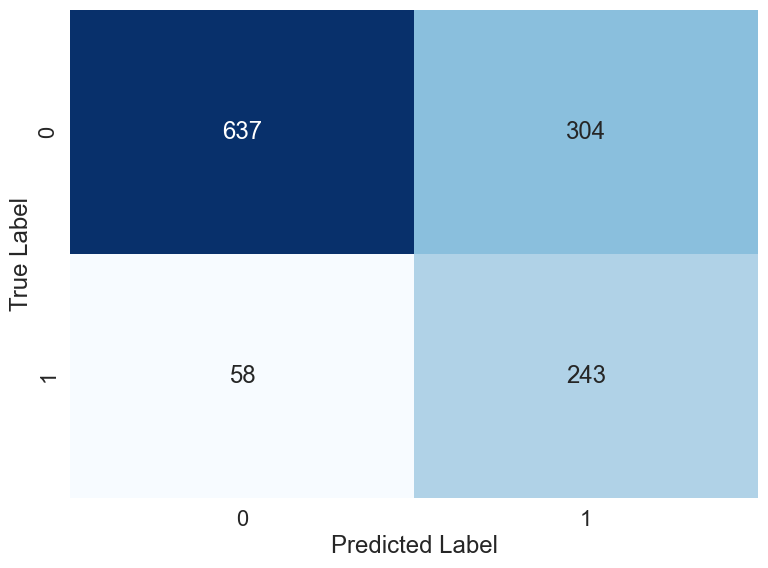


Bagging Classifier:
Accuracy: 0.9476650563607085
Confusion Matrix:
 [[908  33]
 [ 32 269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       941
           1       0.89      0.89      0.89       301

    accuracy                           0.95      1242
   macro avg       0.93      0.93      0.93      1242
weighted avg       0.95      0.95      0.95      1242



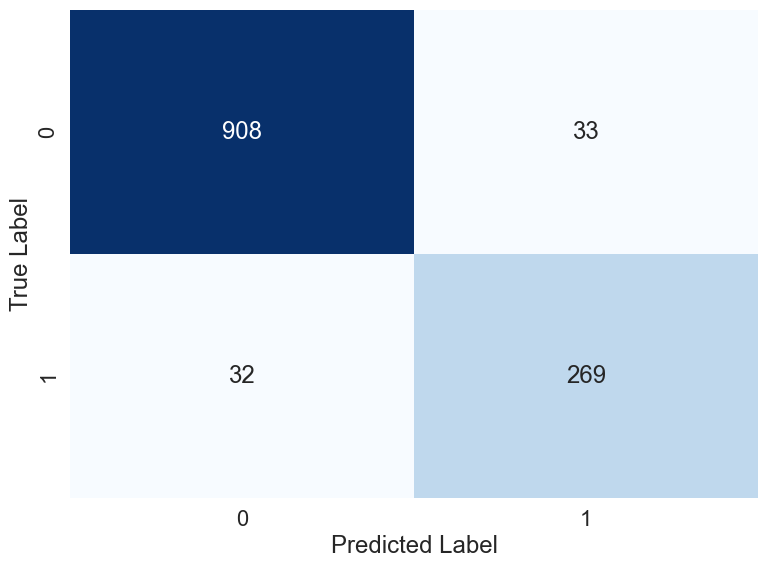

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_std, y_train)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Extra Trees": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier()
}

# Iterate through each classifier, train and evaluate
for name, clf in classifiers.items():
    print(f"\n{name} Classifier:")
    
    # Train the model on the SMOTE-balanced dataset
    clf.fit(X_resampled, y_resampled)
    
    # Predict on test data
    y_pred = clf.predict(x_test_std)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print performance metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


# Developed a dataset which is created based on mathematical equations of dataset 
# This dataset includes Best,Worst,Average cases
# The created dataset is evaluated with Previously developed ML model
# Results are given below

# Here our dataset is cross validated with Random Forest classifier previously it has an accuracy of 96.2%

Best Case Accuracy:    1.000 ± 0.000
Average Case Accuracy: 1.000 ± 0.000
Worst Case Accuracy:   1.000 ± 0.000


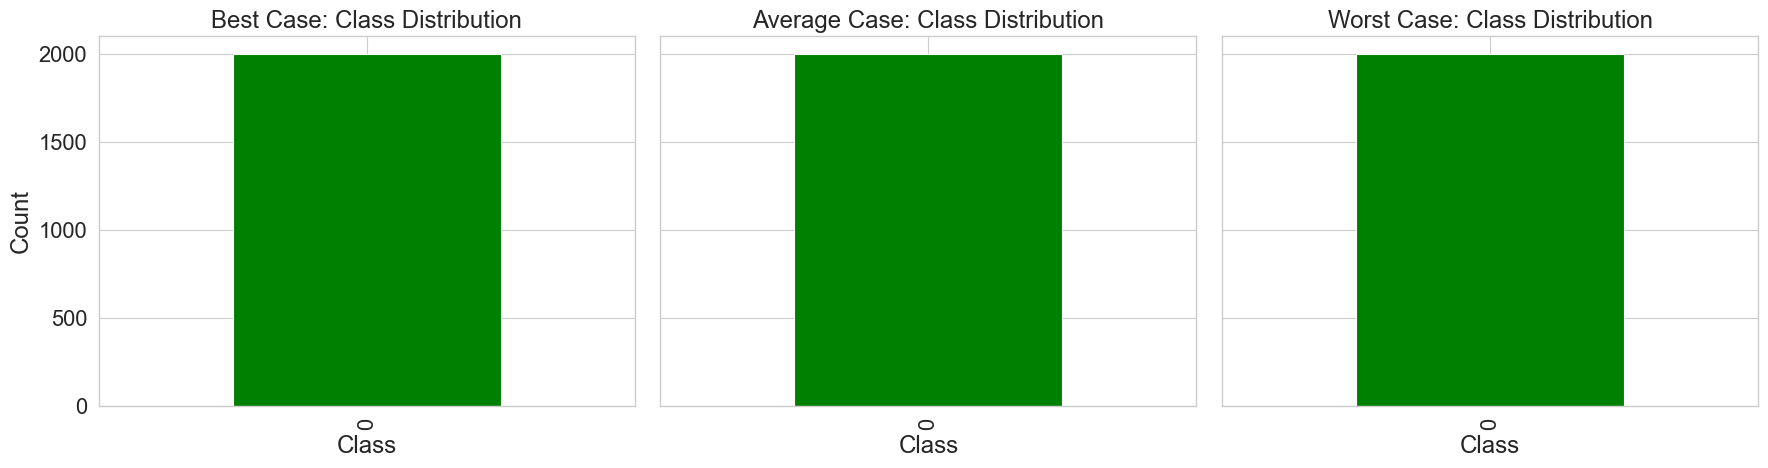

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def generate_synthetic_data(n_samples=1000, scenario='best', random_state=42):
    """
    Generates a synthetic binary classification dataset with 119 features using the provided equation:
    
    y = -534.203 
        + (-0.010)*x1 + (0.000)*x2 + (0.000)*x3 + (-0.000)*x4 + (-0.000)*x5 + (-0.000)*x6 + (-0.000)*x7 
        + (0.003)*x8 + (0.000)*x9 + (0.003)*x10 + (0.000)*x11 + (-0.000)*x12 + (0.010)*x13 
        + (-0.000)*x14 + (0.000)*x15 + (-0.000)*x16 + (-0.000)*x17 + (-0.000)*x18 + (-0.000)*x19 
        + (-0.007)*x20 + (0.000)*x21 + (-0.000)*x22 + (0.000)*x23 + (-0.000)*x24 
        + (1.657)*x25 + (0.000)*x26 + (-0.013)*x27 + (0.234)*x28 + (0.000)*x29 
        + (-1.653)*x30 + (-0.000)*x31 + (-0.897)*x32 + (-0.000)*x33 + (0.643)*x34 
        + (0.001)*x35 + (0.000)*x36 + (-0.001)*x37 + (0.001)*x38 + (-0.001)*x39 
        + (0.001)*x40 + (0.002)*x41 + (3.755)*x42 + (0.000)*x43 + (-0.000)*x44 
        + (0.000)*x45 + (0.000)*x46 + (-0.000)*x47 + (-0.001)*x48 + (-0.001)*x49 
        + (-0.000)*x50 + (0.000)*x51 + (-0.000)*x52 + (0.000)*x53 
        + (25.420)*x54 + (0.000)*x55 + (-0.021)*x56 + (-0.071)*x57 
        + (1.653)*x58 + (0.000)*x59 + (0.896)*x60 + (0.001)*x61 
        + (-0.644)*x62 + (-0.001)*x63 + (0.001)*x64 + (0.001)*x65 
        + (-0.001)*x66 + (0.000)*x67 + (0.000)*x68 + (-0.000)*x69 
        + (-3.756)*x70 + (-0.000)*x71 + (0.000)*x72 + (0.000)*x73 
        + (0.000)*x74 + (-0.000)*x75 + (-0.000)*x76 + (0.001)*x77 
        + (-0.000)*x78 + (-0.000)*x79 + (-0.001)*x80 + (0.000)*x81 
        + (-9.913)*x82 + (0.000)*x83 + (0.052)*x84 + (0.217)*x85 
        + (0.000)*x86 + (0.101)*x87 + (-0.001)*x88 + (-0.001)*x89 
        + (-0.001)*x90 + (-0.000)*x91 + (0.000)*x92 + (-0.000)*x93 
        + (0.000)*x94 + (0.001)*x95 + (0.001)*x96 + (0.002)*x97 
        + (0.000)*x98 + (-0.101)*x99 + (0.001)*x100 + (0.000)*x101 
        + (0.000)*x102 + (0.000)*x103 + (0.000)*x104 + (0.001)*x105 
        + (-0.002)*x106 + (-0.000)*x107 + (-0.000)*x108 
        + (-0.002)*x109 + (-0.000)*x110 + (-8.316)*x111 
        + (0.000)*x112 + (-0.031)*x113 + (0.008)*x114 
        + (0.000)*x115 + (0.000)*x116 + (0.000)*x117 
        + (0.000)*x118 + (0.000)*x119

    Noise is injected based on the scenario:
      - 'best': noise ~ N(0, 0.1)
      - 'average': noise ~ N(0, 1.0)
      - 'worst': noise ~ N(0, 5.0)
    
    The target y is defined as 1 if the noisy score > 0, else 0.
    """
    np.random.seed(random_state)
    n_features = 119

    # Generate features uniformly between -5 and 5
    X = np.random.uniform(-5, 5, (n_samples, n_features))
    
    # Define coefficients for each feature as given in the equation:
    coeffs = np.array([
        -0.010, 0.000, 0.000, -0.000, -0.000, -0.000, -0.000, 0.003, 0.000, 0.003,
         0.000, -0.000, 0.010, -0.000, 0.000, -0.000, -0.000, -0.000, -0.000, -0.007,
         0.000, -0.000, 0.000, -0.000, 1.657, 0.000, -0.013, 0.234, 0.000, -1.653,
        -0.000, -0.897, -0.000, 0.643, 0.001, 0.000, -0.001, 0.001, -0.001, 0.001,
         0.002, 3.755, 0.000, -0.000, 0.000, 0.000, -0.000, -0.001, -0.001, -0.000,
         0.000, -0.000, 0.000, 25.420, 0.000, -0.021, -0.071, 1.653, 0.000, 0.896,
         0.001, -0.644, -0.001, 0.001, 0.001, -0.001, 0.000, 0.000, -0.000, -3.756,
        -0.000, 0.000, 0.000, 0.000, -0.000, -0.000, 0.001, -0.000, -0.000, -0.001,
         0.000, -9.913, 0.000, 0.052, 0.217, 0.000, 0.101, -0.001, -0.001, -0.001,
        -0.000, 0.000, -0.000, 0.000, 0.001, 0.001, 0.002, 0.000, -0.101, 0.001,
         0.000, 0.000, 0.000, 0.000, 0.001, -0.002, -0.000, -0.000, -0.002, -0.000,
        -8.316, 0.000, -0.031, 0.008, 0.000, 0.000, 0.000, 0.000, 0.000
    ])
    # There should be exactly 119 coefficients
    assert len(coeffs) == n_features, "Number of coefficients must equal number of features."
    
    # Compute the score using the mathematical equation
    # score = constant + sum(coeff_i * x_i)
    constant = -534.203
    score = constant + np.dot(X, coeffs)
    
    # Inject noise based on scenario
    if scenario == 'best':
        noise = np.random.normal(0, 0.1, n_samples)
    elif scenario == 'average':
        noise = np.random.normal(0, 1.0, n_samples)
    elif scenario == 'worst':
        noise = np.random.normal(0, 5.0, n_samples)
    else:
        raise ValueError("scenario must be one of ['best', 'average', 'worst']")
    
    score_noisy = score + noise
    
    # Create binary target: y = 1 if score_noisy > 0, else 0
    y = (score_noisy > 0).astype(int)
    
    # Combine features and target into a DataFrame
    feature_columns = [f'x{i}' for i in range(1, n_features + 1)]
    df = pd.DataFrame(X, columns=feature_columns)
    df['y'] = y
    
    return df

# Generate datasets for best, average, and worst scenarios
best_df    = generate_synthetic_data(n_samples=2000, scenario='best')
average_df = generate_synthetic_data(n_samples=2000, scenario='average')
worst_df   = generate_synthetic_data(n_samples=2000, scenario='worst')

# Evaluate using a Random Forest Classifier with 5-fold cross-validation
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(df, model=None):
    if model is None:
        model = RandomForestClassifier(random_state=42)
    
    feature_columns = [f'x{i}' for i in range(1, 120)]  # 119 features
    X = df[feature_columns]
    y = df['y']
    
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean(), scores.std()

best_acc, best_std = evaluate_model(best_df)
avg_acc,  avg_std  = evaluate_model(average_df)
worst_acc, worst_std = evaluate_model(worst_df)

print(f"Best Case Accuracy:    {best_acc:.3f} ± {best_std:.3f}")
print(f"Average Case Accuracy: {avg_acc:.3f} ± {avg_std:.3f}")
print(f"Worst Case Accuracy:   {worst_acc:.3f} ± {worst_std:.3f}")

# Optional: Plot the class distribution for each scenario
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, (scenario_df, title) in zip(axes, [(best_df, "Best"), (average_df, "Average"), (worst_df, "Worst")]):
    scenario_df['y'].value_counts().plot(kind='bar', ax=ax, color=['green', 'blue'])
    ax.set_title(f'{title} Case: Class Distribution')
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()
